**<H1>Versuch 366: Prismen-Spektralapparat</H1>**

In [ ]:
import sys
import os
import sympy as sp
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
import setup_paths

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from tabelle import tabellen_ersteller
from geraden_fit_config import config_1

<H2>Versuchsteil 1: Ausrichten und Vermessen</H2>

**<H4>366.a:** Apperturmessung</H4>

Die Appertur wurde auf $Appertur \pm \Delta Appertur = (0.5 \pm 0.3) \, mm$ bestimmt.

Die Linsenbreite beträgt $b_{Linse} \pm \Delta b_{Linse} = (1.6 \pm 0.3) \, cm$

**<H4>366.b:** Messung der Nullage $\alpha_0$ und der dem Winkel $\gamma$ der brechenden Kante</H4>

In [34]:
# Nullage:
alpha_0=(2 + 11/60)
err_alpha_0=5/60

print(f'Die Nullage liegt bei ({alpha_0} ± {err_alpha_0})°')

Die Nullage liegt bei (2.183333333333333 ± 0.08333333333333333)°


In [37]:
# Winkel der brechenden Kante:

var_names=[a1, a2]=sp.symbols('a1 a2')
formula=1/2*((a1)-(a2)) #a0 hier irrelevant
gaussian_error_propagation(formula, ((a1,65.8,5/60),(a2,-53.983,5/60)))

Formel: 0.5*a1 - 0.5*a2
Werte: ((a1, 65.8, 0.08333333333333333), (a2, -53.983, 0.08333333333333333)) 

Formelwert: 59.8915000000000

Fehlerformel: sqrt((0.5*del_a1)**2 + (-0.5*del_a2)**2)
Fehler: 0.0589255650988790 
Ergebnis: 59.89±0.06
Das Ergebnis hat eine Genauigkeit von 0.1%


**<H4>366.c:** Erstellung der Kalibrationskurve</H4>

In [ ]:
# Es muss nun 1/D_B für den Plot bestimmt werden
# var_names=[l, el, a, ea]=sp.symbols('l el a ea')
# formula_list=[
#     l,
# 	el,
# 	a,
# 	ea
#     ]
# evaluate_gaussian_error('c_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['lambda [nm]','err_lambda [nm]', 'alpha [deg]', 'err_alpha [deg]'], output_file_suffix='calc')

sqrt((del_l)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_el)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_a)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_ea)**2)
Zeile 1: [404.66, 0.0, 0.0, 0.0, 52.3, 0.0, 0.05, 0.0]
Zeile 2: [435.83, 0.0, 0.0, 0.0, 51.4, 0.0, 0.05, 0.0]
Zeile 3: [467.81, 0.0, 0.0, 0.0, 50.7333333333, 0.0, 0.05, 0.0]
Zeile 4: [479.99, 0.0, 0.0, 0.0, 50.55, 0.0, 0.05, 0.0]
Zeile 5: [508.58, 0.0, 0.0, 0.0, 50.1, 0.0, 0.05, 0.0]
Zeile 6: [546.08, 0.0, 0.0, 0.0, 49.6666666667, 0.0, 0.05, 0.0]
Zeile 7: [576.96, 0.0, 0.0, 0.0, 49.3333333333, 0.0, 0.05, 0.0]
Zeile 8: [579.06, 0.0, 0.0, 0.0, 49.2833333333, 0.0, 0.05, 0.0]
Zeile 9: [643.85, 0.0, 0.0, 0.0, 48.8666666667, 0.0, 0.05, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc.csv' gespeichert.


In [ ]:
#runden_und_speichern('c_mess_calc.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'c_mess_calc.csv'

In [ ]:
## Es muss nun 1/D_B für den Plot bestimmt werden
#var_names=[l, a]=sp.symbols('l a')
#formula_list=[
#    a,
#	l
#    ]
#evaluate_gaussian_error('c_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]', 'lambda [nm]'], output_file_suffix='plot')

sqrt((0)**2 + (del_a)**2)
sqrt((del_l)**2 + (0)**2)
Zeile 1: [52.3, 0.05, 404.66, 0.0]
Zeile 2: [51.4, 0.05, 435.83, 0.0]
Zeile 3: [50.73, 0.05, 467.81, 0.0]
Zeile 4: [50.55, 0.05, 479.99, 0.0]
Zeile 5: [50.1, 0.05, 508.58, 0.0]
Zeile 6: [49.67, 0.05, 546.08, 0.0]
Zeile 7: [49.33, 0.05, 576.96, 0.0]
Zeile 8: [49.28, 0.05, 579.06, 0.0]
Zeile 9: [48.87, 0.05, 643.85, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc_rounded_plot.csv' gespeichert.


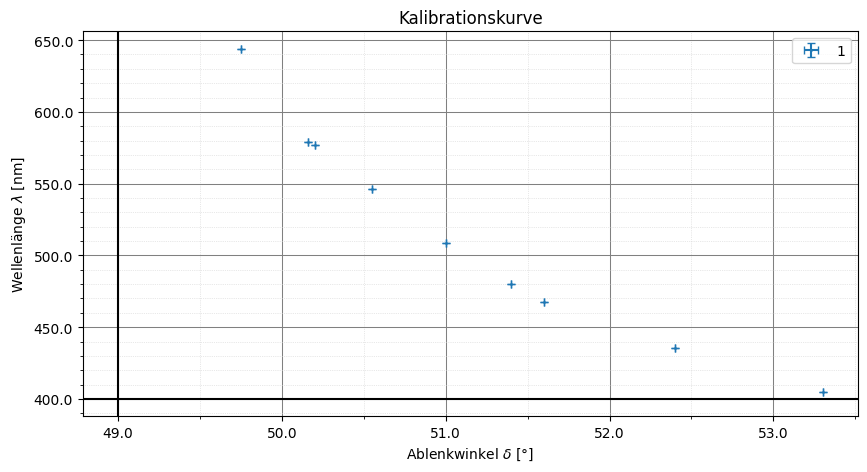

In [10]:
geraden_fit('c_mess.csv', title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			save=False, linear_fit=False, focus_point=False, plot_y_inter=False, legendlocation='best', y_axis=49, x_axis=400,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5)

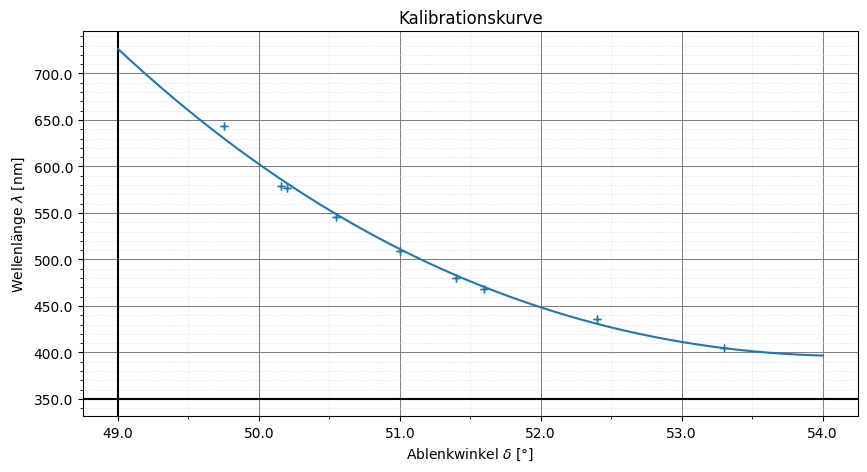

In [32]:
# Definiere die Symbole für die Formel
x = sp.symbols('x')
var_names = [x]

# Definiere die Formel
formula = [(-352054462.05447006)/(x-10)**3+61030408.27458644/(x-10)**2+(-2220318.787083317)/(x-10)+23467.339473939282]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_x_range = (49, 54)

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('c_mess.csv', config, plot_formula=True, title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			 y_axis=49, x_axis=350, linear_fit=False, focus_point=False,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True, legendlocation=None)

Diese fit-Kurve besitzt eine Standardabweichung von $\sigma \approx 9,327$

<H2>Versuchsteil 2: Bestimmung eines unbekannten Elements</H2>

**<H4>366.d:** Lampe 5</H4>

In [33]:
# Winkelrechnung Lampe 5
var_names=[a1, a2]=sp.symbols('a1 a2')
formula_list=[
    (a1+a2/60)
    ]
evaluate_gaussian_error('d_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]'], output_file_suffix='calc')
runden_und_speichern('d_mess_calc.csv')

sqrt((del_a1)**2 + (del_a2/60)**2)
Zeile 1: [49.2666666667, 0.0166666667]
Zeile 2: [49.6166666667, 0.0166666667]
Zeile 3: [50.35, 0.0166666667]
Zeile 4: [50.8666666667, 0.0166666667]
Zeile 5: [51.1666666667, 0.0166666667]
Zeile 6: [52.0, 0.0166666667]
Zeile 7: [52.9, 0.0166666667]
Auswertung abgeschlossen. Ergebnisse wurden in 'd_mess_calc.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "d_mess_calc_rounded.csv" gespeichert.


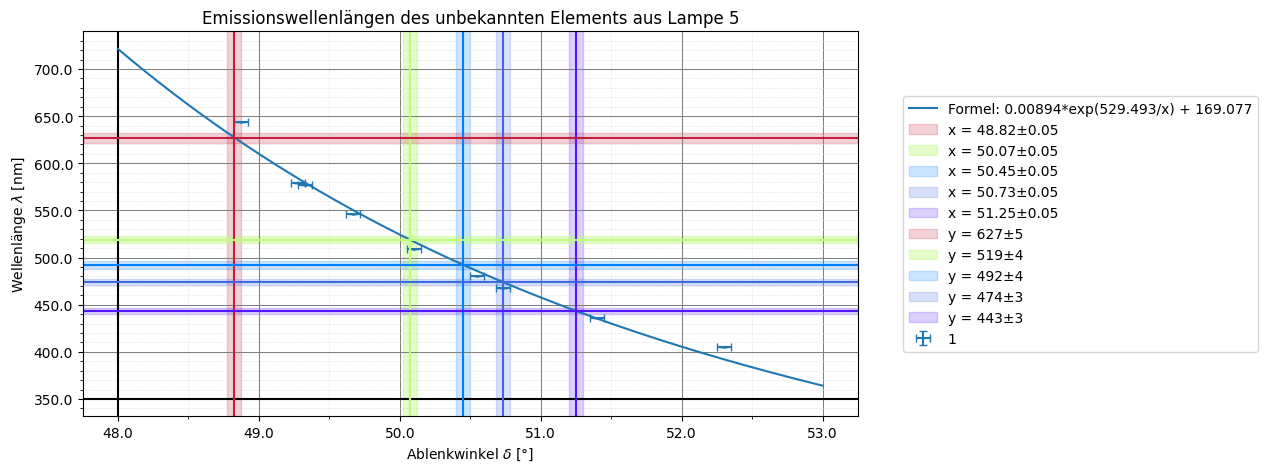

In [11]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 53)

mess_winkel=[(48.82,0.05, '#C41E3A'),
			 (50.07,0.05, '#BDFC7F', 0.4),
			 (50.45,0.05, '#007FFF'),
			 (50.73,0.05, '#4169E1'),
			 (51.25,0.05, '#5218FA')
			 ]

wellenlängen_res=[(627,5, '#C41E3A'),
			 (519,4, '#BDFC7F', 0.4),
			 (492,4, '#007FFF'),
			 (474,3, '#4169E1'),
			 (443,3, '#5218FA')
			 ]

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('c_mess_calc_rounded_plot.csv', config, plot_formula=True, title='Emissionswellenlängen des unbekannten Elements aus Lampe 5',
			y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			legendlocation='outside right', y_axis=48, x_axis=350, linear_fit=False, focus_point=False, x_lines=mess_winkel, y_lines=wellenlängen_res,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True)

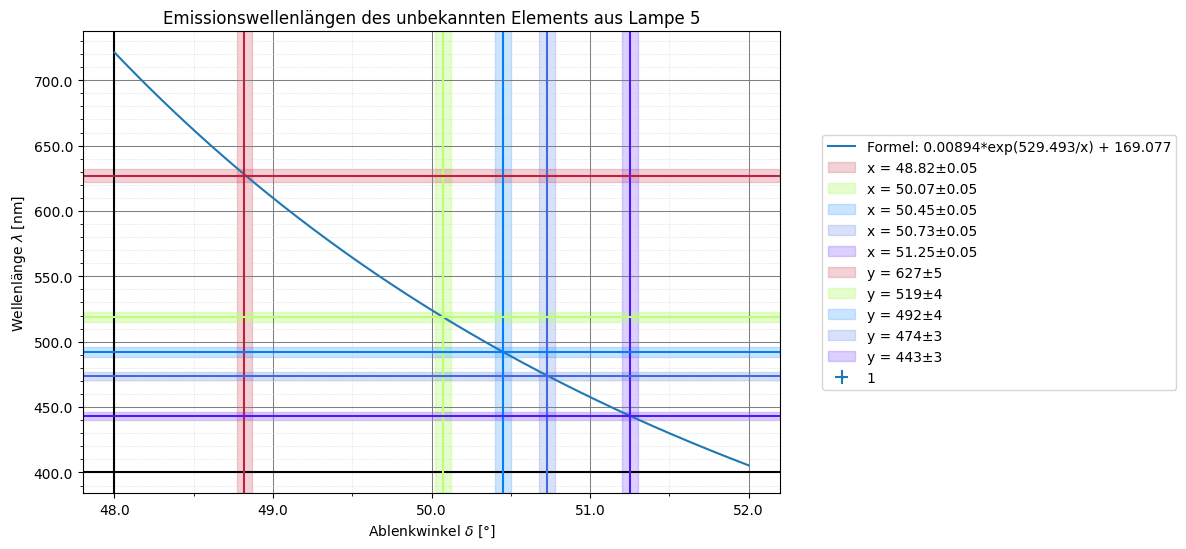

In [17]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 52)

mess_winkel=[(48.82,0.05, '#C41E3A'),
			 (50.07,0.05, '#BDFC7F', 0.4),
			 (50.45,0.05, '#007FFF'),
			 (50.73,0.05, '#4169E1'),
			 (51.25,0.05, '#5218FA')
			 ]

wellenlängen_res=[(627,5, '#C41E3A'),
			 (519,4, '#BDFC7F', 0.4),
			 (492,4, '#007FFF'),
			 (474,3, '#4169E1'),
			 (443,3, '#5218FA')
			 ]

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('d_inv_plot.csv', config, plot_formula=True, length=9, height=6,
			title='Emissionswellenlängen des unbekannten Elements aus Lampe 5', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			legendlocation='outside right', y_axis=48, x_axis=400, linear_fit=False, focus_point=False, x_lines=mess_winkel, y_lines=wellenlängen_res,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True)

In [ ]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[lam, delta, gamma]=sp.symbols('lam delta gamma')
formula_list=[
	1/lam**2*10**6,
    (sp.sin((gamma+delta)*sp.pi/360)/sp.sin(gamma*sp.pi/360))
    ]
evaluate_gaussian_error('e_werte.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['1/lambda^2 [1/nm^2]', 'n'], output_file_suffix='plot')